## 1. Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import itertools    # memory-efficient tools for working with iterators

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import pickle

## 2. Load the data into a DataFrame

In [2]:
# Read the data into a Dataframe
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.shape

(6335, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
# Extract the `text` column
df.text[10]

'CEDAR RAPIDS, Iowa — “I had one of the most wonderful rallies of my entire career right here in 1992,” Bill Clinton said by way of opening to the crowd of more than 1,100 on Saturday night.\r\n\r\nTwo days before the Iowa caucuses, Cedar Rapids tried to deliver that same old feeling to his wife, Hillary Clinton.\r\n\r\nIn the crowd,\xa0one woman held a sign that said “227 years of men. It’s HER turn!" Some carried signs and books. Others had traveled from as far as Missouri. They had waited hours, even after the fire marshal told them there was no more room inside the high school gymnasium.\r\n\r\nThe restive crowd chanted slogans and buzzed with anticipation until finally Bill, Hillary and Chelsea Clinton all appeared on stage hand-in-hand, an hour behind schedule. As they roared, Hillary Clinton beamed.\r\n\r\nIt has been a long slog in Iowa for the Clinton campaign, which has struggled mightily to shake the label that its supporters can’t muster the enthusiasm of its rival’s backer

## Applying a Stemmer to text data

In [6]:
# Initialize the Snowball stemmer for english
stemmer = SnowballStemmer("english")

# sample text
text = ['Fake news is a type of yellow journalism or propaganda that consists of deliberate misinformation or hoaxes spread via traditional news media or online social media.']

# Tokenize the text
words = text[0].split()
stems = [stemmer.stem(word) for word in words]
print(stems)

['fake', 'news', 'is', 'a', 'type', 'of', 'yellow', 'journal', 'or', 'propaganda', 'that', 'consist', 'of', 'deliber', 'misinform', 'or', 'hoax', 'spread', 'via', 'tradit', 'news', 'media', 'or', 'onlin', 'social', 'media.']


In [10]:
import re
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk

# Download the 'stopwords' dataset if it's not already downloaded
nltk.download('stopwords')

# Initialize the Snowball stemmer for english
stemmer = SnowballStemmer("english")

# The stemmer on the text data
def stemming(content):
    con = re.sub('[^a-zA-Z]', ' ', content)
    con = con.lower()
    con = con.split()
    # Apply the Snowball stemmer and filter out the stopwords
    con = [stemmer.stem(word) for word in con if not word in stopwords.words('english')]
    stems = ' '.join(con)

    return stems

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
stemming('Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam.')

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam'

In [12]:
# Apply the stemmer on the text column in dataset
df['text'] = df['text'].apply(stemming)

In [13]:
df['text']

,text
0,daniel greenfield shillman journal fellow free...
1,googl pinterest digg linkedin reddit stumbleup...
2,u secretari state john f kerri said monday sto...
3,kayde king kaydeek novemb lesson tonight dem l...
4,primari day new york front runner hillari clin...
...,...
6330,state depart told republican nation committe c...
6331,p pbs stand plutocrat pentagon post oct wikime...
6332,anti trump protest tool oligarchi reform alway...
6333,addi ababa ethiopia presid obama conven meet l...


### Get the labels from the DataFrame

In [14]:
# Get labels
labels = df.label
labels.head()

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL


In [15]:
#labels = labels.map({'FAKE': 0, 'REAL': 1})
#labels.info()

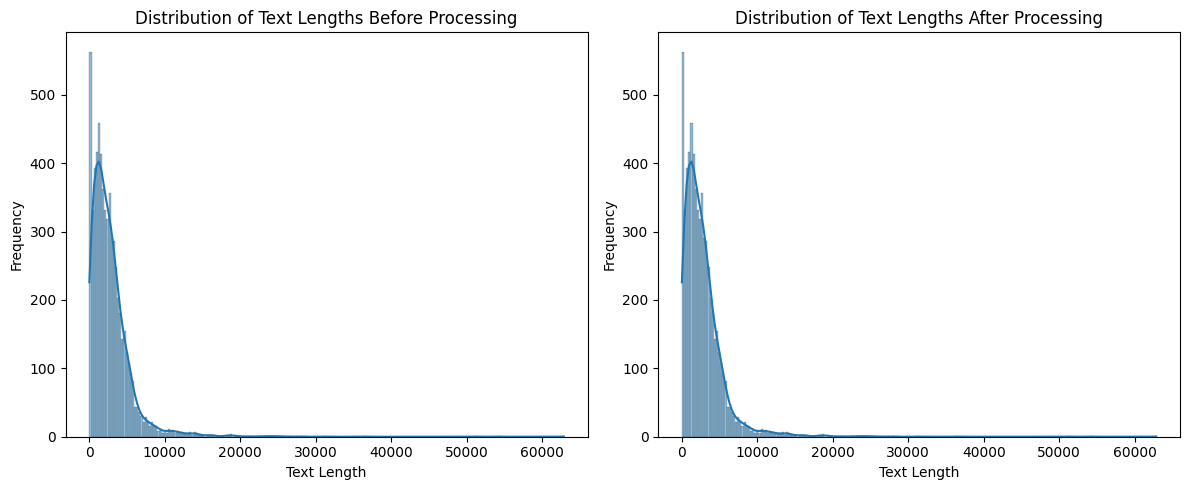

In [33]:
# prompt: give code for ploting graph of data before processing and after processing data

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the original text data in a variable called 'original_text_data'
# and the processed text data in a variable called 'processed_text_data'

# Calculate the length of each text before processing
original_text_lengths = [len(text) for text in df['text'] ] # Replace with your original text data

# Calculate the length of each text after processing
processed_text_lengths = [len(text) for text in df['text'] ] # Replace with your processed text data


# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of text lengths before processing
sns.histplot(original_text_lengths, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Text Lengths Before Processing')
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')

# Plot the distribution of text lengths after processing
sns.histplot(processed_text_lengths, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Text Lengths After Processing')
ax[1].set_xlabel('Text Length')
ax[1].set_ylabel('Frequency')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## 3. Split the dataset into training and testing sets

In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [17]:
# Join the tokens back into single strings
#X_train = [' '.join(doc) for doc in X_train]
#X_test = [' '.join(doc) for doc in X_test]

In [18]:
X_train

,text
6237,head lead survivalist group made sever shock a...
3722,arnaldo rodger train educ psychologist work co...
5774,patti sanchez use eat calori day weigh kilogra...
336,benjamin netanyahu reelect regard apathi mani ...
3622,john kasich kill iowa voter banter larri coral...
...,...
5699,
2550,american elect wealthi presid polit expert say...
537,anyon write sentenc like nevertheless fuel per...
1220,cathol congress ever posit power howev pope fr...


## 4. Feature Engineering on text data

In [19]:
# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train and test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## 5. Model Training

In [20]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = pac.predict(tfidf_test)

In [21]:
y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

## 6. Evaluate the Model

In [22]:
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(score*100, 2)}%")

Accuracy score: 92.11%


In [23]:
# Bulid a confusion matrix to evaluate the model
confusion_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
confusion_matrix

array([[581,  57],
       [ 43, 586]])

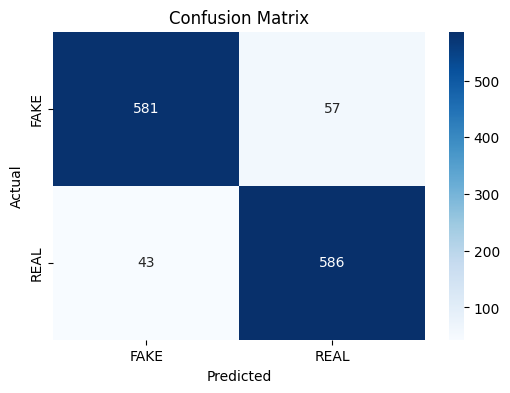

In [25]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined from your previous code
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



## Save the Models

In [26]:
pickle.dump(tfidf_vectorizer, open('vector.pkl', 'wb'))
pickle.dump(pac, open('pac_model.pkl', 'wb'))

In [27]:
# Check the model and vector if they work
load_model = pickle.load(open('pac_model.pkl', 'rb'))
vector_load = pickle.load(open('vector.pkl', 'rb'))

In [28]:
def fake_news_detect(news):
    news = stemming(news)
    input_data = [news]
    vector_form1 = vector_load.transform(input_data)
    prediction = load_model.predict(vector_form1)
    return prediction

In [29]:
# Test the models
value = fake_news_detect("""kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run establish candid peopl berni peopl berni novemb dem want tight race work berni walker bragman walkerbragman novemb new york time columnist paul krugman one hillari clinton outspoken surrog contenti democrat primari blame clinton poor perform green parti candid jill stein far receiv neglig number vote nation say stein ralph nader prevent clinton victori account berniesteach threw krugman analysi back face candid issu take respons https co khyouusrf teacher berni berniesteach novemb ana navarro republican recent endors hillari clinton sum preposter natur presidenti elect tweet gop nomin damn candid could lose hillari clinton democrat nomin damn candid could lose trump ana navarro ananavarro novemb popular left wing facebook page pro sander primari respond trump surg simpli post meme sander face text could avoid thank noth dnc meme share almost time less hour post tuesday novemb berni sander endors hillari clinton democrat nation convent juli mani support remain adam refus support dnc anoint candid point wikileak revel top offici dnc work behind scene tip scale clinton favor coordin media figur circul anti sander narrat rather attribut potenti trump presid gop nomine perceiv popular among voter close elect could credit hillari clinton unfavor rate accord realclearpolit anywher percent voter negat opinion democrat nomine pm eastern florida michigan pennsylvania wisconsin remain close call clinton elector vote trump zach cartwright activist author richmond virginia enjoy write polit govern media send email email protect""")
value

array(['FAKE'], dtype='<U4')

In [30]:
if value == 'FAKE':
    print('Fake news')
else:
    print('Real news')

Fake news


In [31]:


from sklearn.ensemble import RandomForestClassifier

# ... (Your existing code for data loading, preprocessing, and splitting) ...

# ## 5. Model Training
# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(tfidf_test)

# ## 6. Evaluate the Model
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {round(score*100, 2)}%")

# ... (Your existing code for confusion matrix and saving the model) ...

# Save the Random Forest model
pickle.dump(rf_classifier, open('rf_model.pkl', 'wb'))

# ... (Your existing code for loading the model and prediction function) ...

# Check the model and vector if they work
load_model = pickle.load(open('rf_model.pkl', 'rb'))
vector_load = pickle.load(open('vector.pkl', 'rb'))

# ... (Your existing code for fake news detection function) ...

# Test the models
value = fake_news_detect("""kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run establish candid peopl berni peopl berni novemb dem want tight race work berni walker bragman walkerbragman novemb new york time columnist paul krugman one hillari clinton outspoken surrog contenti democrat primari blame clinton poor perform green parti candid jill stein far receiv neglig number vote nation say stein ralph nader prevent clinton victori account berniesteach threw krugman analysi back face candid issu take respons https co khyouusrf teacher berni berniesteach novemb ana navarro republican recent endors hillari clinton sum preposter natur presidenti elect tweet gop nomin damn candid could lose hillari clinton democrat nomin damn candid could lose trump ana navarro ananavarro novemb popular left wing facebook page pro sander primari respond trump surg simpli post meme sander face text could avoid thank noth dnc meme share almost time less hour post tuesday novemb berni sander endors hillari clinton democrat nation convent juli mani support remain adam refus support dnc anoint candid point wikileak revel top offici dnc work behind scene tip scale clinton favor coordin media figur circul anti sander narrat rather attribut potenti trump presid gop nomine perceiv popular among voter close elect could credit hillari clinton unfavor rate accord realclearpolit anywher percent voter negat opinion democrat nomine pm eastern florida michigan pennsylvania wisconsin remain close call clinton elector vote trump zach cartwright activist author richmond virginia enjoy write polit govern media send email email protect""")
value
if value == 'FAKE':
    print('Fake news')
else:
    print('Real news')

Accuracy score: 89.42%
Fake news


In [32]:
# prompt: suggest more models for better accuracy score and give code

# ... (Your existing code for data loading, preprocessing, and splitting) ...

# ## 5. Model Training
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# Initialize a Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', probability=True)  # You can experiment with different kernels
svc_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = svc_classifier.predict(tfidf_test)

# ## 6. Evaluate the Model
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score (SVC): {round(score*100, 2)}%")

# Save the SVC model
pickle.dump(svc_classifier, open('svc_model.pkl', 'wb'))


# Initialize a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(tfidf_test)

# Evaluate the Model
score = accuracy_score(y_test, y_pred)
print(f"Accuracy score (Naive Bayes): {round(score*100, 2)}%")

# Save the Naive Bayes model
pickle.dump(nb_classifier, open('nb_model.pkl', 'wb'))

# ... (Your existing code for loading the model and prediction function) ...

# Check the model and vector if they work
load_model = pickle.load(open('svc_model.pkl', 'rb'))  # Or 'nb_model.pkl'
vector_load = pickle.load(open('vector.pkl', 'rb'))

# ... (Your existing code for fake news detection function) ...

# Test the models
value = fake_news_detect("""kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run establish candid peopl berni peopl berni novemb dem want tight race work berni walker bragman walkerbragman novemb new york time columnist paul krugman one hillari clinton outspoken surrog contenti democrat primari blame clinton poor perform green parti candid jill stein far receiv neglig number vote nation say stein ralph nader prevent clinton victori account berniesteach threw krugman analysi back face candid issu take respons https co khyouusrf teacher berni berniesteach novemb ana navarro republican recent endors hillari clinton sum preposter natur presidenti elect tweet gop nomin damn candid could lose hillari clinton democrat nomin damn candid could lose trump ana navarro ananavarro novemb popular left wing facebook page pro sander primari respond trump surg simpli post meme sander face text could avoid thank noth dnc meme share almost time less hour post tuesday novemb berni sander endors hillari clinton democrat nation convent juli mani support remain adam refus support dnc anoint candid point wikileak revel top offici dnc work behind scene tip scale clinton favor coordin media figur circul anti sander narrat rather attribut potenti trump presid gop nomine perceiv popular among voter close elect could credit hillari clinton unfavor rate accord realclearpolit anywher percent voter negat opinion democrat nomine pm eastern florida michigan pennsylvania wisconsin remain close call clinton elector vote trump zach cartwright activist author richmond virginia enjoy write polit govern media send email email protect""")
value
if value == 'FAKE':
    print('Fake news')
else:
    print('Real news')

Accuracy score (SVC): 93.05%
Accuracy score (Naive Bayes): 85.24%
Fake news


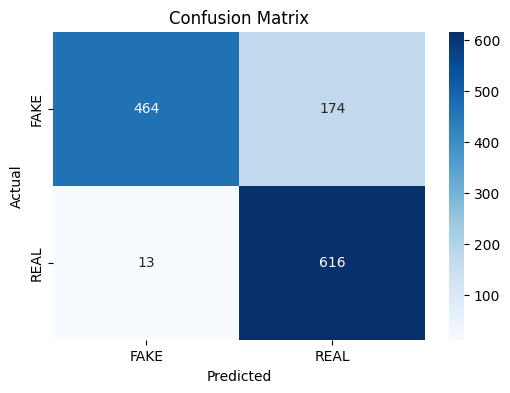

              precision    recall  f1-score   support

        FAKE       0.97      0.73      0.83       638
        REAL       0.78      0.98      0.87       629

    accuracy                           0.85      1267
   macro avg       0.88      0.85      0.85      1267
weighted avg       0.88      0.85      0.85      1267



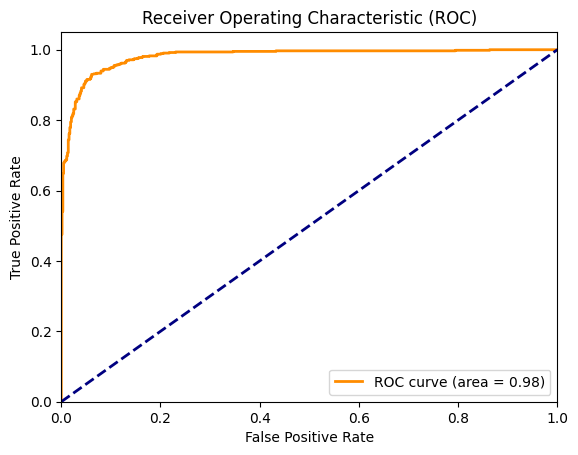

In [34]:

cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# Feature Importance (for tree-based models like Random Forest)
if isinstance(load_model, RandomForestClassifier):
  importances = load_model.feature_importances_
  feature_names = tfidf_vectorizer.get_feature_names_out()
  feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
  feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
  plt.figure(figsize=(10, 6))
  sns.barplot(x='importance', y='feature', data=feature_importances_df.head(20))
  plt.title('Top 20 Feature Importances (Random Forest)')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()

# ROC Curve and AUC (for binary classification)
from sklearn.metrics import roc_curve, auc
if 'FAKE' in y_test.unique() and 'REAL' in y_test.unique():
  y_pred_proba = load_model.predict_proba(tfidf_test)[:, 1]  # Probability of being 'REAL'
  fpr, tpr, thresholds = roc_curve(y_test.map({'FAKE': 0, 'REAL': 1}), y_pred_proba)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()

# ... (rest of your code) ...